In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/home/msc24h18/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


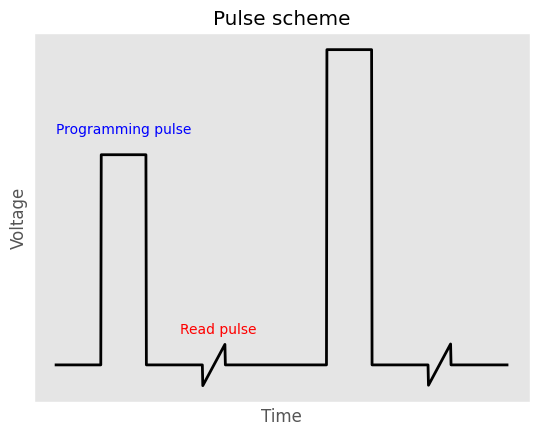

In [66]:
def _single_pulse(x, v_start=1, v_inc=0.1, v_read=0.1):
    pulseStart = 0.2
    pulseEnd = 0.4
    rpulseStart = 0.65
    rpulseEnd = 0.75

    v = v_start + int(x) * v_inc
    x = x % 1

    if (x < pulseStart or x >= rpulseEnd) or (x >= pulseEnd and x < rpulseStart):
        return 0
    if x >= pulseStart and x < pulseEnd:
        return v
    if x >= rpulseStart and x < rpulseEnd:
        m = 2 * v_read / (rpulseEnd - rpulseStart)
        return m * (x - 0.7)

single_pulse = np.vectorize(_single_pulse, otypes=[np.float64])
    
x = np.linspace(0, 2, 1000)
y = single_pulse(x, v_start=1, v_inc=0.5)

fig, ax = plt.subplots()
ax.plot(x, y, color='black', lw=2)
ax.set(xticks=[], yticks=[], title='Pulse scheme', xlabel="Time", ylabel="Voltage")
ax.annotate('Programming pulse', xy=(0, 1.1), color='blue')
ax.annotate('Read pulse', xy=(0.55, 0.15), color='red')
#plt.savefig('tmp.png')
plt.show()